In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LogisticRegression

In [38]:
df = pd.read_csv('Challenger_data.csv')

In [39]:
df.head()

,Unnamed: 0,temp,pres,fail,n,erosion,blowby,damage
0,4/12/81,66,50,0,6,0,0,0
1,11/12/81,70,50,1,6,1,0,4
2,3/22/82,69,50,0,6,0,0,0
3,11/11/82,68,50,0,6,0,0,0
4,4/4/83,67,50,0,6,0,0,0


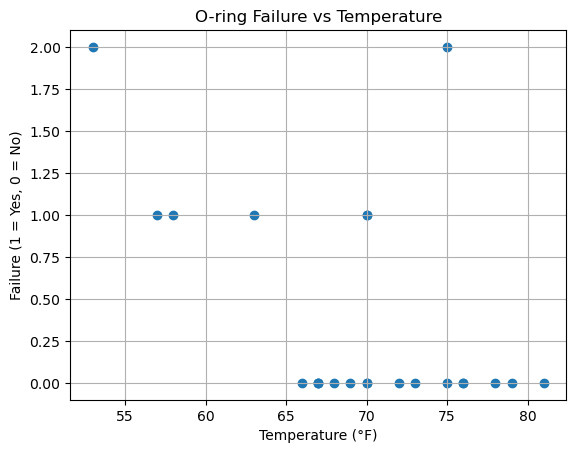

In [40]:
X = df[["temp"]]
y = df["fail"]
plt.scatter(X,y)
plt.title("O-ring Failure vs Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Failure (1 = Yes, 0 = No)")
plt.grid(True)
plt.show()

#### Preprocessing Data

In [71]:
### failure can only be classified as 0 or 1 
for index in df.index:
    if df.at[index, "fail"] != 0 and df.at[index, "fail"] != 1:
        df.drop(index, inplace=True)
df = df.reset_index(drop=True)

X = df[["temp"]]
y = df["fail"]

df

,Unnamed: 0,temp,pres,fail,n,erosion,blowby,damage
0,4/12/81,66,50,0,6,0,0,0
1,11/12/81,70,50,1,6,1,0,4
2,3/22/82,69,50,0,6,0,0,0
3,11/11/82,68,50,0,6,0,0,0
4,4/4/83,67,50,0,6,0,0,0
5,6/18/83,72,50,0,6,0,0,0
6,8/30/83,73,50,0,6,0,0,0
7,11/28/83,70,100,0,6,0,0,0
8,2/3/84,57,100,1,6,1,0,4
9,4/6/84,63,200,1,6,1,0,2


In [75]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

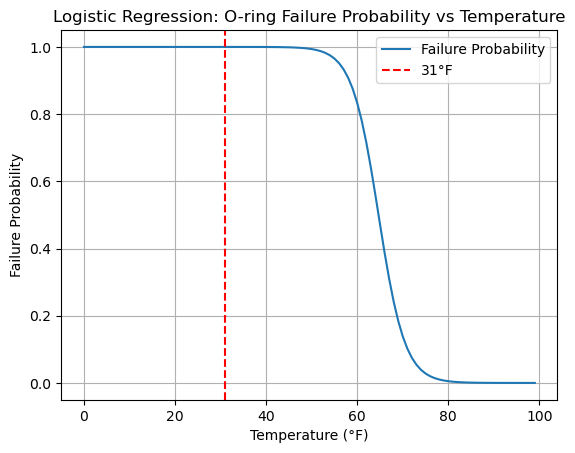

In [76]:
model = LogisticRegression()
model.fit(X, y)

temps = np.arange(0, 100)
probs = model.predict_proba(temps.reshape(-1, 1))[:, 1]

plt.plot(temps, probs, label='Failure Probability')
plt.axvline(31, color='red', linestyle='--', label='31°F')
plt.title("Logistic Regression: O-ring Failure Probability vs Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Failure Probability")
plt.legend()
plt.grid(True)
plt.show()


In [77]:
temp_input = np.array([[31]])
failure_prob = model.predict_proba(temp_input)[0][1]

print(f"Estimated probability of O-ring failure at 31°F: {failure_prob:.4f}")

Estimated probability of O-ring failure at 31°F: 1.0000
